In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT

from my_utils import *

def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(  np.dot(deviations**2,weights)   )
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(  sum(deviations**2) /len(x)  )
def list_mean(x):
  mean = sum(x)/len(x)
  return mean

Welcome to JupyROOT 6.14/04


['0011']
0 ------------> peaking time =  15 , gain =  4
Press enter to continue
1 . scan 


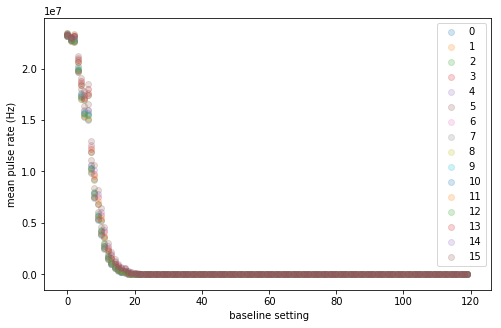

0011 average(16chan) noise thresh: mean =  4.15  +-  0.217   |  RMS  =  3.391  +-  0.159
1 ------------> peaking time =  15 , gain =  4
Press enter to continue
2 . scan 


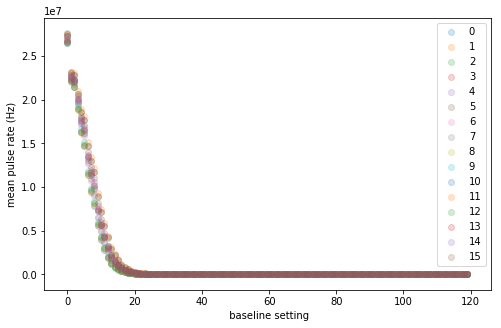

0011 average(16chan) noise thresh: mean =  4.364  +-  0.308   |  RMS  =  3.803  +-  0.219
2 ------------> peaking time =  15 , gain =  4
Press enter to continue
3 . scan 


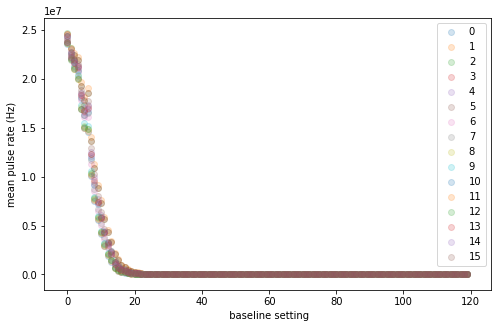

0011 average(16chan) noise thresh: mean =  4.423  +-  0.291   |  RMS  =  3.672  +-  0.216


>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reache

In [2]:
## scan threshold of all boar
from functools import (reduce)
from math import (sqrt)
import numpy as np
import time
import tdc_daq as td
import matplotlib.pyplot as plt
import db



# rootMeanSquare :: [Num] -> Float
def rootMeanSquare(xs):
    return sqrt(reduce(lambda a, x: a + x * x, xs, 0) / len(xs))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)

#ptime_list = [ 10, 15, 20 ]
ptime_list = [ 15 ]
# pt_gain_list = [ 1, 2, 4 ]
pt_gain_list = [4]  

# for single board noise measurement, set all other boards to standby
for my_board in db.board_list():
  db.set_standby_board(my_board)

# used_boards = [ "0021"]
# used_boards = [ "0110",  "0009"  ]
# used_boards = ["0009", "0011" ,"0108", "0102", "0103" ]
used_boards = ["0011"]
# used_boards = db.board_list_installed()
# used_boards = used_boards[0:10]
# used_boards = used_boards[10:30]
print(used_boards)
nscans = 3
n_scan_steps = len(ptime_list)*len(pt_gain_list)*nscans

plt.rcParams["figure.figsize"] = (8,5)
trendtime_list = []
rmsAverageTrend_list = []
rmsAverageTrendError_list = []
meanAverageTrend_list = []
meanAverageTrendError_list = []

mean_scans = [[[] for b in range(len(used_boards)) ]  for i in range(n_scan_steps) ]
rms_scans =  [[[] for b in range(len(used_boards)) ]  for i in range(n_scan_steps) ]

scaler_list_channel = [[[] for i in range(n_scan_steps) ]  for i in range(16)] 
   




for ptime in ptime_list: 
 for pt_gain in pt_gain_list: 
  b = -1    
  for name in used_boards: 
   b += 1        
   scan_step = -1
   for scan in range(0,nscans): 
    scan_step += 1 
    print(scan_step,"------------> peaking time = ", ptime, ", gain = ", pt_gain)
    #alert("next measure")
    input("Press enter to continue")

    db.unset_standby_board(name)
    td.enable_tdc_channels_of_active_boards()
    ptc.init_active_boards()
    # pause for not killing trb by sending to many parallel commands regiser writes:
    time.sleep(5) 
    trendtime_list += [ name ]
    ptc.init_boards_by_name(used_boards, ptime, pt_gain)   
    print(len(trendtime_list),". scan ")
    #### baseline scan, all channels in parallel (same baseline set to all channels at once):
    #if scan == 0:
     #   print(" parallel baseline scan, all channels same baseline set at a step")        
    baseline_calib.baseline_calib_by_noise(name, dummy_calib=True) 
    #### baseline scan each channel individual, while other channels are "inactive", = baseline is minimal -15 or (maximal +15)
   # if scan == 1:
      #  print(" individual baseline scan, inactive = -15 ")
    #baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=True) 
    #if scan == 2:
    #    print(" individual baseline scan, all other channesl active  baseline = calibrated individual baseline")
       # bl_values = [0]*16
        ## get the baselines calibrated for all 16 channels from database:
      #  calib = db.get_calib_json_by_name(name)
     #   if ("baselines" in calib):
     #       board_baselines = calib["baselines"]
     #       bl_values   = board_baselines[0:17]   
      #  print(bl_values)
     #   baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=True,baseline_inactive=bl_values)
#     calib       = db.get_calib_json_by_name(name)


    #dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
#     board_info  = db.find_board_by_name(name)
#     baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)
    #print(json.dumps(dummy_calib,indent=2, sort_keys=True))
    #tsbl_scan_raw = dummy_calib["noise_scan_raw"]
    #tsbl_range    = dummy_calib["bl_range"]

#     scaler_list = []
#     scaler_list = td.scaler_rate_of_board(name,0.2)

    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)

    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)

    #print(json.dumps(dummy_calib,indent=2, sort_keys=True))
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]
    

    for i in range(0,16):
     plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.2,label = "{:d}".format(i))

     plt.legend()
     plt.xlabel("  baseline setting ")
     plt.ylabel("mean pulse rate (Hz)")
     #plt.yscale('log') 
    plt.show()


    fwhm_list = []
    max_list  = []
    rms_list = []
    mean_list = []
    for i in range(0,16):
      fwhm_list += [ fwhm(tsbl_range,tsbl_scan_raw[i]) ]
      rms_list += [ hist_rms(tsbl_range,tsbl_scan_raw[i]) ]
      mean_list += [ MeanArrays(tsbl_range,tsbl_scan_raw[i]) ]  
      max_list  += [ np.max(tsbl_scan_raw[i])  ]
      scaler_list_channel[i][scan_step] = tsbl_scan_raw[i] 
    mean_scans[scan][b] = mean_list
    rms_scans[scan][b]  = rms_list    
    fwhm_list = np.array(fwhm_list)
    max_list  = np.array(max_list)
    
    print(name, "average(16chan) noise thresh: mean = ", round(sum(mean_list)/len(mean_list),3), " +- ", round(list_rms(mean_list),3), "  |  RMS  = ", round(sum(rms_list)/len(rms_list),3), " +- ", round(list_rms(rms_list),3) )

    meanAverageTrend_list += [ sum(mean_list)/len(mean_list) ]
    meanAverageTrendError_list += [ list_rms(mean_list) ]
    rmsAverageTrend_list += [ sum(rms_list)/len(rms_list) ]
    rmsAverageTrendError_list += [ list_rms(rms_list) ]    
    



0011


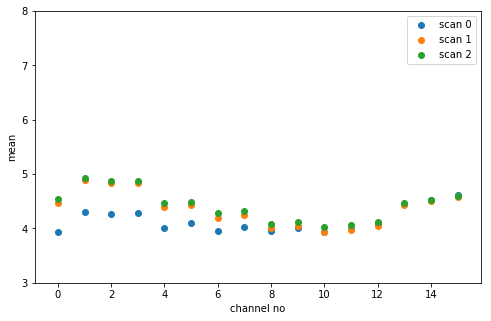

0011


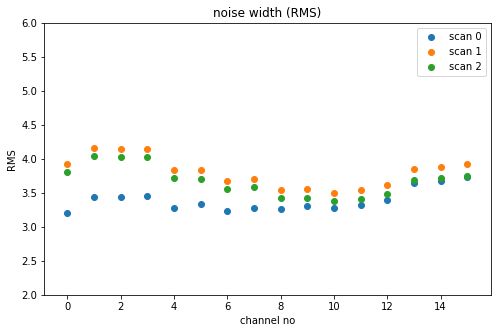

channel :  0


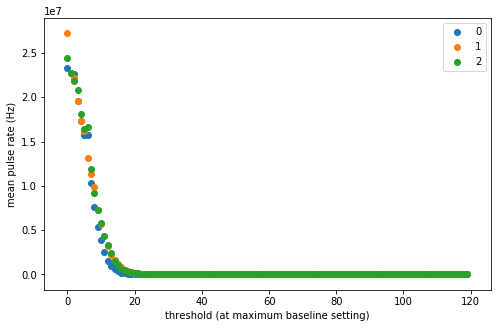

channel :  1


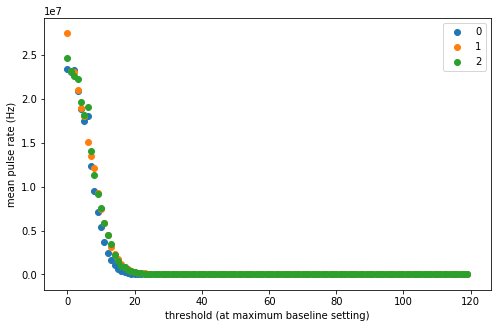

channel :  2


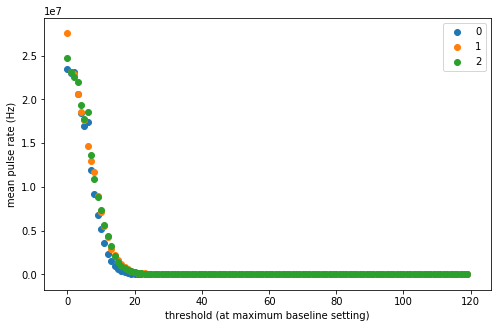

channel :  3


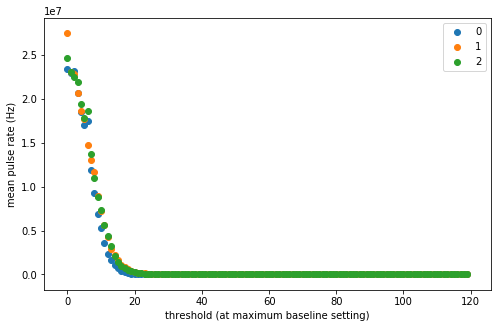

channel :  4


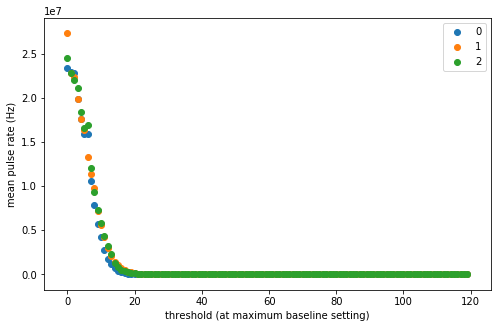

channel :  5


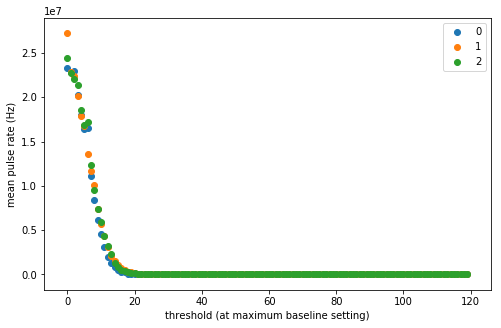

channel :  6


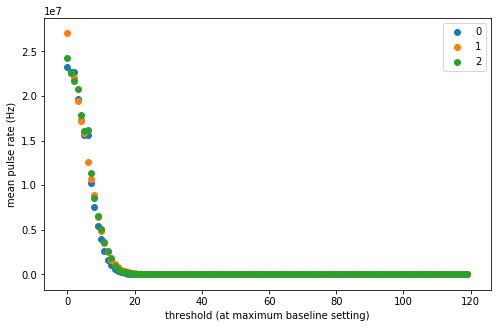

channel :  7


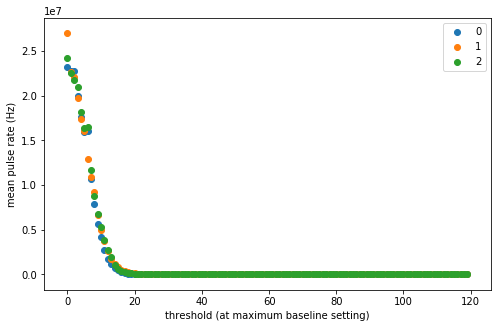

channel :  8


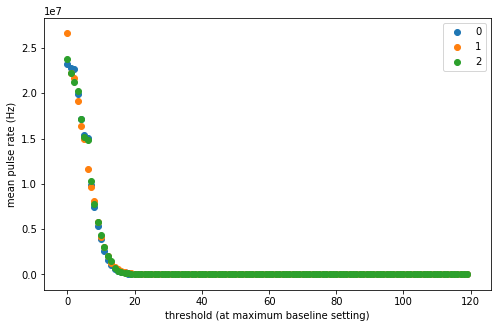

channel :  9


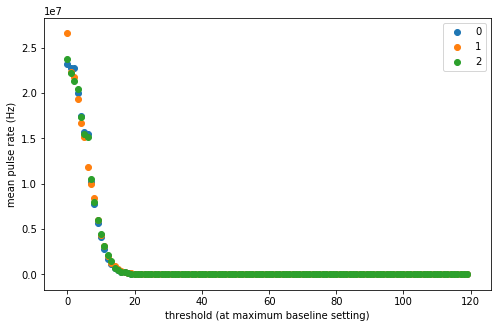

channel :  10


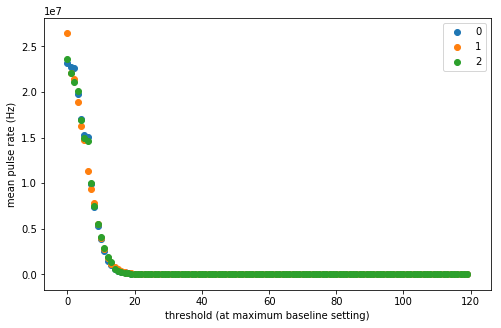

channel :  11


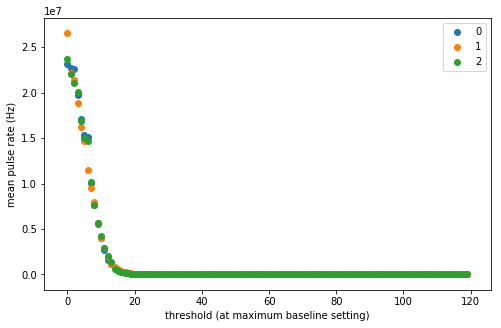

channel :  12


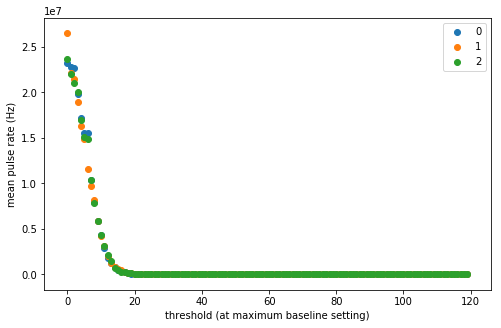

channel :  13


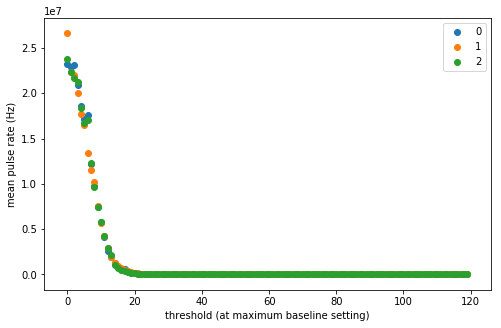

channel :  14


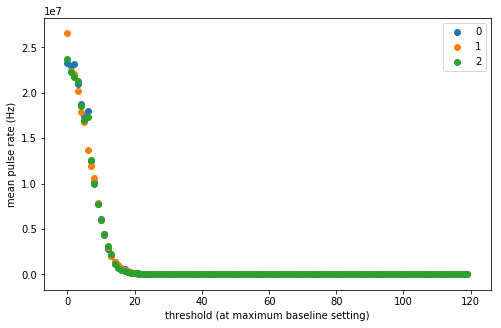

channel :  15


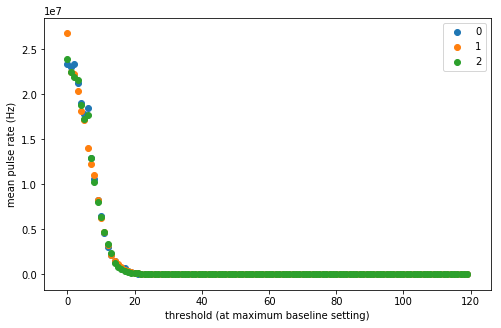

In [3]:
for i in range(len(used_boards)):
 print(used_boards[i])
 for scan in range(0,nscans): 
    plt.scatter(list(range(0,len(mean_scans[scan][i]))), mean_scans[scan][i],label = "scan {:d}".format(scan))
    plt.xlabel("channel no")
    plt.ylabel("mean")
    plt.ylim(ymax = 8, ymin = 3)
 plt.legend()
 plt.show()
for i in range(len(used_boards)):
 print(used_boards[i])
 for scan in range(0,nscans): 
#     plt.scatter(list(range(0,len(mean_scans[scan]))),rms_scans[scan],color='blue',label = "scan {:d}".format(scan))
    plt.scatter(list(range(0,len(mean_scans[scan][i]))),rms_scans[scan][i], label = "scan {:d}".format(scan))  
    plt.xlabel("channel no")
    plt.ylabel("RMS")
    plt.ylim(ymax = 6, ymin = 2)
    plt.title("noise width (RMS)")
 plt.legend()
 plt.show()

for ch in range(0,16):
    print("channel : ",ch)
    for i in range(0,len(scaler_list_channel[ch])):
     plt.scatter(tsbl_range,scaler_list_channel[ch][i],label = "{:d}".format(i))

     plt.legend()
     plt.xlabel("threshold (at maximum baseline setting)")
     plt.ylabel("mean pulse rate (Hz)")
     #plt.yscale('log') 
    plt.show()


In [4]:
#archive(label="baseline_individual_scan_board0021_4xLVDS-Ferrites")

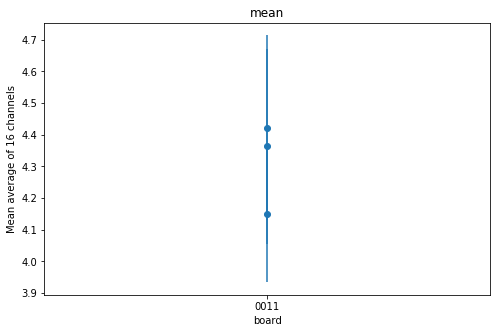

No handles with labels found to put in legend.


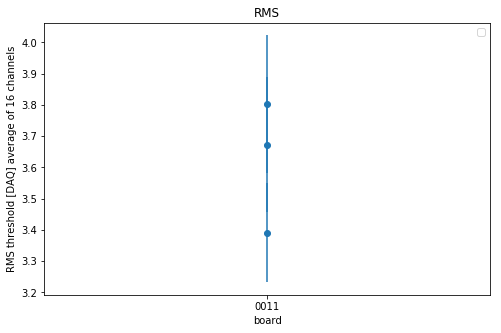

Mean (of all boards) =  4.31245404784  +-  0.116995651375
RMS (of all boards) =  3.6218229918  +-  0.17200487926


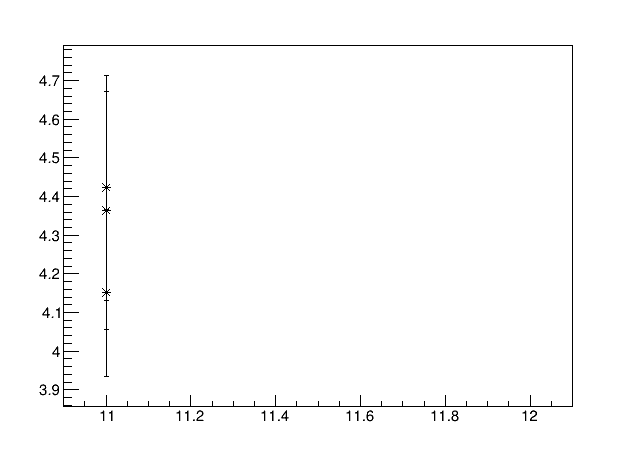

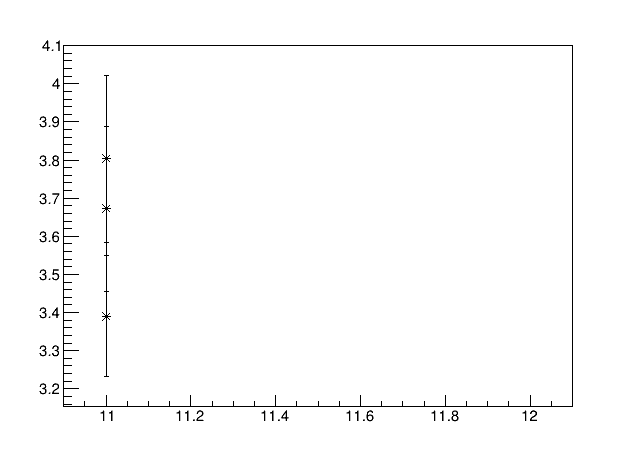

In [5]:
plt.errorbar(trendtime_list, meanAverageTrend_list, yerr=meanAverageTrendError_list, fmt='o')
#plt.scatter(trendtime_list, meanAverageTrend_list)
plt.xlabel("board")
plt.ylabel("Mean average of 16 channels")
plt.title("mean")
plt.show()
    
plt.errorbar(trendtime_list, rmsAverageTrend_list, yerr=rmsAverageTrendError_list, fmt='o')
plt.xlabel("board")
plt.ylabel("RMS threshold [DAQ] average of 16 channels")
plt.title("RMS")
plt.legend()
plt.show()

import ROOT


gr  = ROOT.TGraphErrors()
gr2 = ROOT.TGraphErrors()
#len(meanAverageTrend_list),np.array(trendtime_list),np.array(meanAverageTrend_list))
for i in range(0,len(meanAverageTrend_list)):
    gr.SetPoint(i, np.double(trendtime_list[i]), np.double(meanAverageTrend_list[i]))
    gr.SetPointError(i, 0, np.double(meanAverageTrendError_list[i]) )
    gr2.SetPoint(i, np.double(trendtime_list[i]), np.double(rmsAverageTrend_list[i]))
    gr2.SetPointError(i, 0, np.double(rmsAverageTrendError_list[i]) )    
c = ROOT.TCanvas("mean","mean",640,480)
gr.Draw("A*")
c.Draw()
c2 = ROOT.TCanvas("rms","rms",640,480)
gr2.Draw("A*")

c2.Draw()
print("Mean (of all boards) = ", list_mean(meanAverageTrend_list), " +- ", list_rms(meanAverageTrend_list) )
print("RMS (of all boards) = ", list_mean(rmsAverageTrend_list), " +- ", list_rms(rmsAverageTrend_list) )

#db.find_board_by_name("0030")

channel :  0
channel :  1
channel :  2
channel :  3
channel :  4
channel :  5
channel :  6
channel :  7
channel :  8
channel :  9
channel :  10
channel :  11
channel :  12
channel :  13
channel :  14
channel :  15


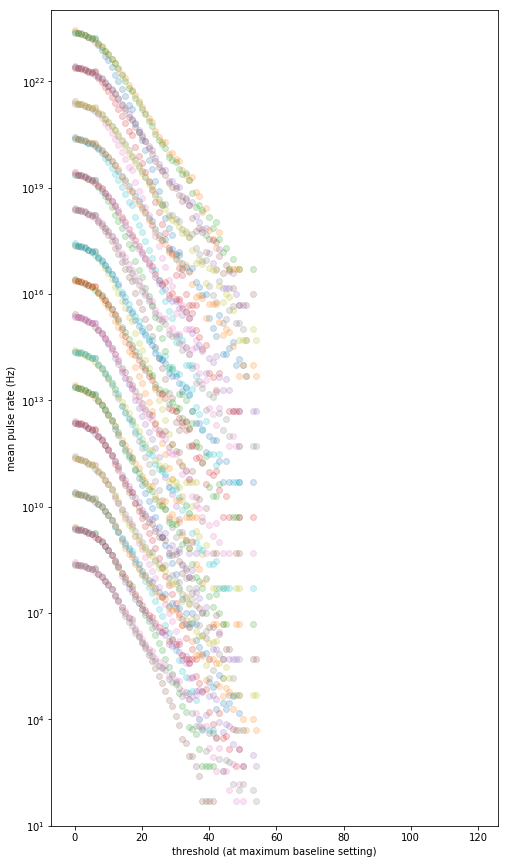

In [6]:
plt.rcParams["figure.figsize"] = (8,15)
for ch in range(0,16):
    print("channel : ",ch)
    for i in range(0,len(scaler_list_channel[ch])):
     nums = np.array(scaler_list_channel[ch][i])*10**(16-ch)
     plt.scatter(tsbl_range,nums,alpha=0.2,label = "scan {:d}".format(i))

     #plt.legend()
     plt.xlabel("threshold (at maximum baseline setting)")
     plt.ylabel("mean pulse rate (Hz)")

plt.yscale('log') 
plt.ylim(ymax = 1E24, ymin = 1E1)
plt.show()

